# Dealing with Missing Values
#### Missing values in any dataset can cause a lot of problems. One must deal with them or there can be consequences.

## 1. Import the Libraries
 For this, we are using following libraries:

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset
 For this, we are using Titanic Dataset.

In [3]:
#Load the Data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 Let's visualize which columns has missing values.

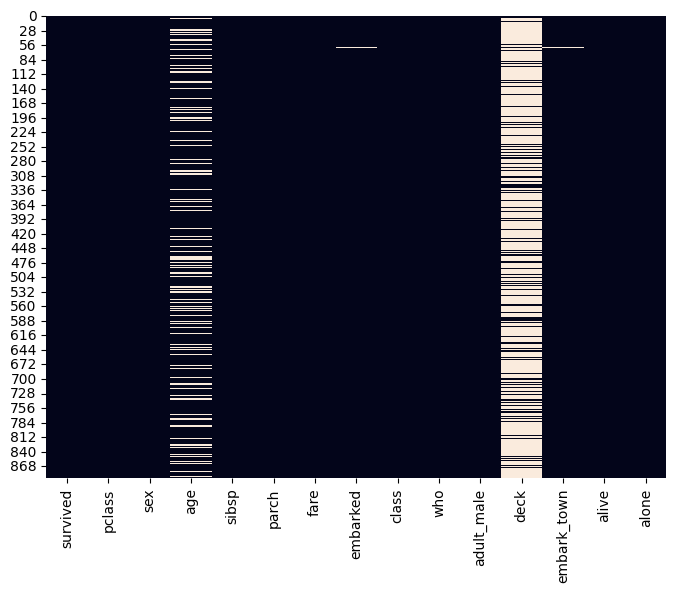

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [6]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [9]:
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

 As it seems, deck, age, embark and embarked_town has missing values.

 There are different methods of handeling missing values. One of them is using mean, median mode and impute the dataset with one of them. 

In [19]:
round(df['age'].mean(), 2)

29.7

In [28]:
df['age'].median()

29.69911764705882

In [18]:
# Mean  of age to fill missing values
df['age'] = df['age'].fillna(df['age'].mean())

In [29]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

 As you can see, we have imputed the age column and hence, there are no more missing values in age column. Now we are left with other three columns. 
 We can also drop the columns.


In [30]:
# Drop deck column
df.drop('deck', axis=1, inplace=True)

In [36]:
df.isnull().sum().sort_values(ascending=False)

embarked       2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

 We have dropped deck column and its no longer part of our dataset.

In [34]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [38]:
#Replacing embarked and embark_town missing values with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [39]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

 Column 'embark_town' and 'embarked' has also been imputed using mode method. Now, there are no more missing values in our dataset. 


# Sk-learn
 There is another method of handeling missing values which is using sk-learn library.

In [40]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [41]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 First is 'age' column so we will impute it using simpleimputer from sklearn.


In [44]:
#Impute age column using sklearn
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

In [45]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

By using simpleimputer from sklearn, we have imputed 'age' column and there are not any missing values in it. I used median but mean and mode can also be used.
Another method of handeling missing values from sklearn is univariate and multivariate imputation.

## Uniavriate and Multivariate imputation
Univariate imputation considers each variable independently and imputes missing values in each variable using information only from that variable.

Multivariate imputation considers the relationships between all variables and imputes missing values in each variable using information from all the available variables.

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Multivariate Imputation

In [47]:
df = sns.load_dataset('titanic')

In [59]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [62]:
#imputing age column using iterative imputer
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df['age'] = imputer.fit_transform(df[['age']])

In [64]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

The column of 'age' has been imputed using multivariate imputer. Another method of imputing missing values is forward fill and backward fill.

# Forward fill and backward fill
 Forward Fill fills in missing values by using the last observed value for that variable. Backward Fill fills in missing values by using the next observed value for that variable.

### Forward Fill

In [83]:
df = sns.load_dataset('titanic')
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
#using ffill(forward fill) impute
df['age'] = df['age'].ffill()

In [85]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

The column of 'age' has been imputed using forward fill. The same process can be done with backword fill.

### Backward Fill

In [86]:
df['embark_town'] = df['embark_town'].bfill()

In [87]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

'embark_town' column has also been imputed using bfill. Another method to handle missing values is knnImputer method.

### Knn-Imputer
The K-Nearest Neighbors (KNN) Imputer is a method that imputes missing values in a dataset by using the average (or most common category) of the K nearest non-missing data points for each missing entry.

In [88]:
df = sns.load_dataset('titanic')

In [89]:
#using knn imputer
from sklearn.impute import KNNImputer

In [90]:
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

In [91]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

Another method is dropping rows with missing values.


In [92]:
# Drop rows with missing values
df.dropna(inplace=True)

In [93]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

All the rows with missing values has been dropped and we are left with no more missing values by using 'dropna' method. However, if you look carefully at the dataset now,

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     201 non-null    int64   
 1   pclass       201 non-null    int64   
 2   sex          201 non-null    object  
 3   age          201 non-null    float64 
 4   sibsp        201 non-null    int64   
 5   parch        201 non-null    int64   
 6   fare         201 non-null    float64 
 7   embarked     201 non-null    object  
 8   class        201 non-null    category
 9   who          201 non-null    object  
 10  adult_male   201 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  201 non-null    object  
 13  alive        201 non-null    object  
 14  alone        201 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 20.1+ KB


We can clearly see that more than half of our entries has been gone. Therefore, using this method will not help. For training the model, we need every entry as long as it holds some important information otherwise dropping columns is wise. But in our case, we just dropped the rows meaning they are no longer part of our dataset yet, they might had had some information. So, be careful and wise in identifying which method is best for handeling missing values.